# Importing and Defining

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Reading the Data Set
dataset = pd.read_csv('TATAPOWER.csv')

# Exploring the Data

In [3]:
dataset.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAPOWER,EQ,01-Jan-03,111.70,112.30,112.30,111.05,111.65,111.45,111.58,105301,11749225.30,-,35001,33.24
1,TATAPOWER,EQ,02-Jan-03,111.45,111.20,111.95,110.15,110.50,110.45,111.06,112308,12472530.85,-,61653,54.9
2,TATAPOWER,EQ,03-Jan-03,110.45,111.15,111.90,109.05,109.25,109.25,110.03,93582,10296827.00,-,54118,57.83
3,TATAPOWER,EQ,06-Jan-03,109.25,109.60,110.50,107.45,107.65,107.80,108.98,124951,13616753.80,-,63316,50.67
4,TATAPOWER,EQ,07-Jan-03,107.80,109.80,109.80,106.20,106.55,106.55,107.02,107587,11514225.70,-,69794,64.87


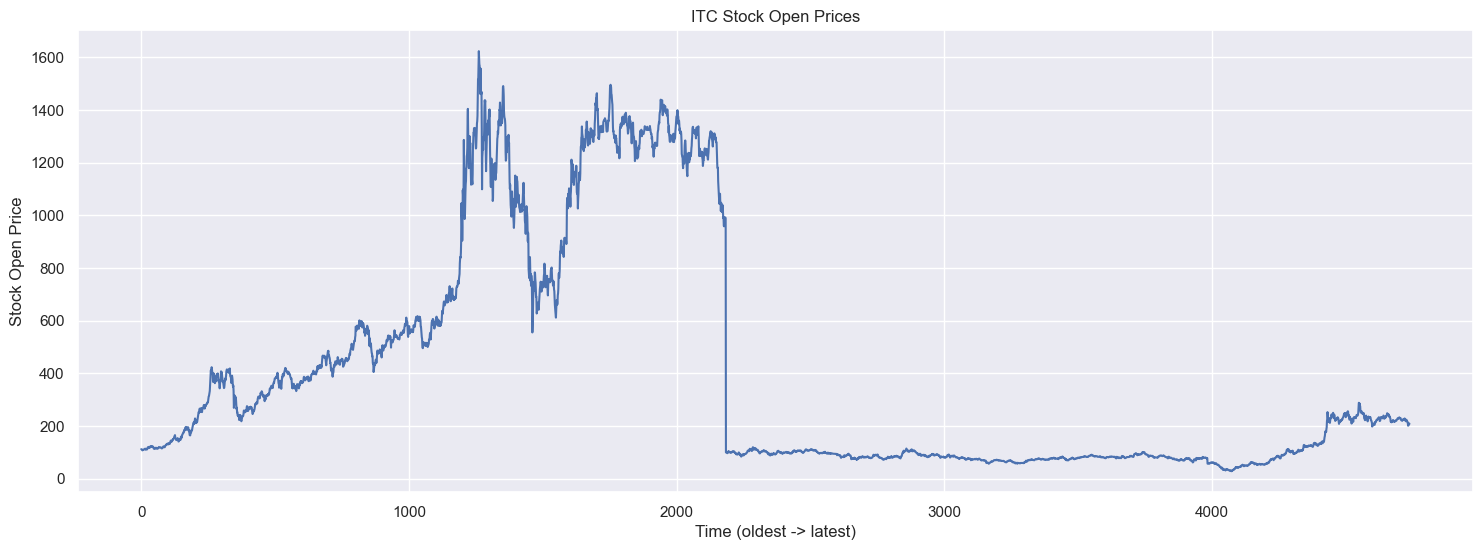

In [4]:
#Representing Price on Graph
plt.figure(figsize=(18, 6))
plt.plot(dataset['Average Price'])
plt.title("ITC Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [5]:
#Analysing the Data types in the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  4738 non-null   object 
 1   Series                  4738 non-null   object 
 2   Date                    4738 non-null   object 
 3   Prev Close              4738 non-null   float64
 4   Open Price              4738 non-null   float64
 5   High Price              4738 non-null   float64
 6   Low Price               4738 non-null   float64
 7   Last Price              4738 non-null   float64
 8   Close Price             4738 non-null   float64
 9   Average Price           4738 non-null   float64
 10  Total Traded Quantity   4738 non-null   int64  
 11  Turnover                4738 non-null   float64
 12  No. of Trades           4738 non-null   object 
 13  Deliverable Qty         4738 non-null   int64  
 14  % Dly Qt to Traded Qty  4738 non-null   

In [6]:
#Null value analyses 
dataset.isnull().values.any()

False

# Converting the object values into numbers and removing the Extra Column 

In [7]:
#On 11 Sept 2011 Tata Power Stock Splited in the ratio of 1:10, 
#Dividing all the prices before that by 10 and multiplying the traded quantity and deliverable quantity by 10 to maintain the evenness in data 
dataset['Average Price'] = np.where(dataset.index < 2184,
                                           dataset['Average Price']/10,
                                           dataset['Average Price'])
dataset['Prev Close'] = np.where(dataset.index < 2185,
                                           dataset['Prev Close']/10,
                                           dataset['Prev Close'])
dataset['High Price'] = np.where(dataset.index < 2184,
                                           dataset['High Price']/10,
                                           dataset['High Price'])
dataset['Open Price'] = np.where(dataset.index < 2184,
                                           dataset['Open Price']/10,
                                           dataset['Open Price'])
dataset['Low Price'] = np.where(dataset.index < 2184,
                                           dataset['Low Price']/10,
                                           dataset['Low Price'])
dataset['Last Price'] = np.where(dataset.index < 2184,
                                           dataset['Last Price']/10,
                                           dataset['Last Price'])
dataset['Close Price'] = np.where(dataset.index < 2184,
                                           dataset['Close Price']/10,
                                           dataset['Close Price'])
dataset['Total Traded Quantity'] = np.where(dataset.index < 2184,
                                           dataset['Total Traded Quantity']*10,
                                           dataset['Total Traded Quantity'])
dataset['Deliverable Qty'] = np.where(dataset.index < 2184,
                                           dataset['Deliverable Qty']*10,
                                           dataset['Deliverable Qty'])

In [8]:
# Replacing the Missing Values of number of trades with Column Avg.
dataset['No. of Trades']=dataset['No. of Trades'].str.replace("-", "52248")
dataset['No. of Trades']=dataset['No. of Trades'].astype(float)

In [9]:
# Converting object values into float
dataset['Total Traded Quantity']=dataset['Total Traded Quantity'].astype(float)
dataset['Deliverable Qty']=dataset['Deliverable Qty'].astype(float)

In [10]:
# Replacing deliverable % on missing values with 100 as in bulk Order delivery percent is 100.
dataset['% Dly Qt to Traded Qty']=dataset['% Dly Qt to Traded Qty'].str.replace("-","100")
dataset['% Dly Qt to Traded Qty']=dataset['% Dly Qt to Traded Qty'].astype(float)

In [11]:
# Converting Dates into numeric format.
dataset['Date']=dataset['Date'].str.replace("-Jan-"," 01 ")
dataset['Date']=dataset['Date'].str.replace("-Feb-"," 02 ")
dataset['Date']=dataset['Date'].str.replace("-Mar-"," 03 ")
dataset['Date']=dataset['Date'].str.replace("-Apr-"," 04 ")
dataset['Date']=dataset['Date'].str.replace("-May-"," 05 ")
dataset['Date']=dataset['Date'].str.replace("-Jun-"," 06 ")
dataset['Date']=dataset['Date'].str.replace("-Jul-"," 07 ")
dataset['Date']=dataset['Date'].str.replace("-Aug-"," 08 ")
dataset['Date']=dataset['Date'].str.replace("-Sep-"," 09 ")
dataset['Date']=dataset['Date'].str.replace("-Oct-"," 10 ")
dataset['Date']=dataset['Date'].str.replace("-Nov-"," 11 ")
dataset['Date']=dataset['Date'].str.replace("-Dec-"," 12 ")

In [12]:
# Removing symbol column as it contains single category data.
dataset=dataset.drop(['Symbol'],axis=1)

In [13]:
# Turning the categorical data into numbers(Series)
dataset['Series']=dataset['Series'].str.replace("EQ","0")
dataset['Series']=dataset['Series'].str.replace("BL","1")
dataset['Series']=dataset['Series'].astype(bool)

In [14]:
# Adding a Return column
dataset['%Return']=(dataset['Close Price']-dataset['Prev Close'])/dataset['Prev Close']*100

In [15]:
dataset.head()

,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%Return
0,True,01 01 03,11.170,11.230,11.230,11.105,11.165,11.145,11.158,1053010.0,11749225.30,52248.0,350010.0,33.24,-0.223814
1,True,02 01 03,11.145,11.120,11.195,11.015,11.050,11.045,11.106,1123080.0,12472530.85,52248.0,616530.0,54.90,-0.897263
2,True,03 01 03,11.045,11.115,11.190,10.905,10.925,10.925,11.003,935820.0,10296827.00,52248.0,541180.0,57.83,-1.086464
3,True,06 01 03,10.925,10.960,11.050,10.745,10.765,10.780,10.898,1249510.0,13616753.80,52248.0,633160.0,50.67,-1.327231
4,True,07 01 03,10.780,10.980,10.980,10.620,10.655,10.655,10.702,1075870.0,11514225.70,52248.0,697940.0,64.87,-1.159555


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Series                  4738 non-null   bool   
 1   Date                    4738 non-null   object 
 2   Prev Close              4738 non-null   float64
 3   Open Price              4738 non-null   float64
 4   High Price              4738 non-null   float64
 5   Low Price               4738 non-null   float64
 6   Last Price              4738 non-null   float64
 7   Close Price             4738 non-null   float64
 8   Average Price           4738 non-null   float64
 9   Total Traded Quantity   4738 non-null   float64
 10  Turnover                4738 non-null   float64
 11  No. of Trades           4738 non-null   float64
 12  Deliverable Qty         4738 non-null   float64
 13  % Dly Qt to Traded Qty  4738 non-null   float64
 14  %Return                 4738 non-null   

In [17]:
# Exporting Processed Data
dataset.to_csv("processed_tatapower.csv", index = False)

 # Data Visualisation

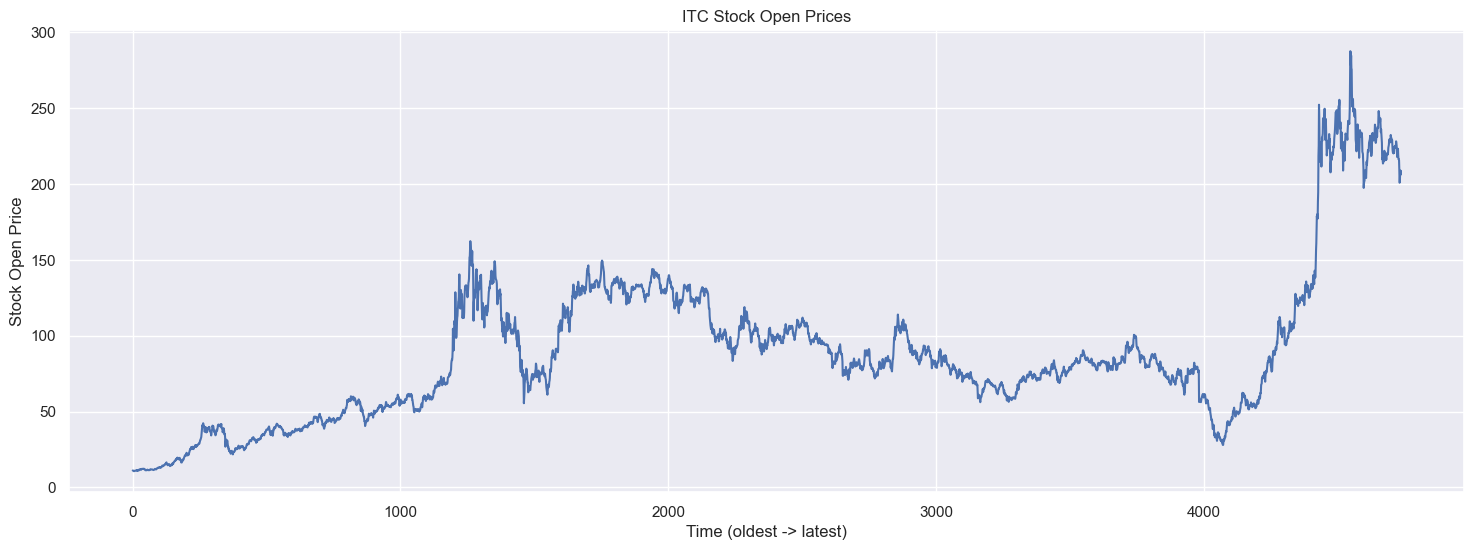

In [18]:
#Representing Processed Price on Graph
plt.figure(figsize=(18, 6))
plt.plot(dataset['Average Price'])
plt.title("ITC Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

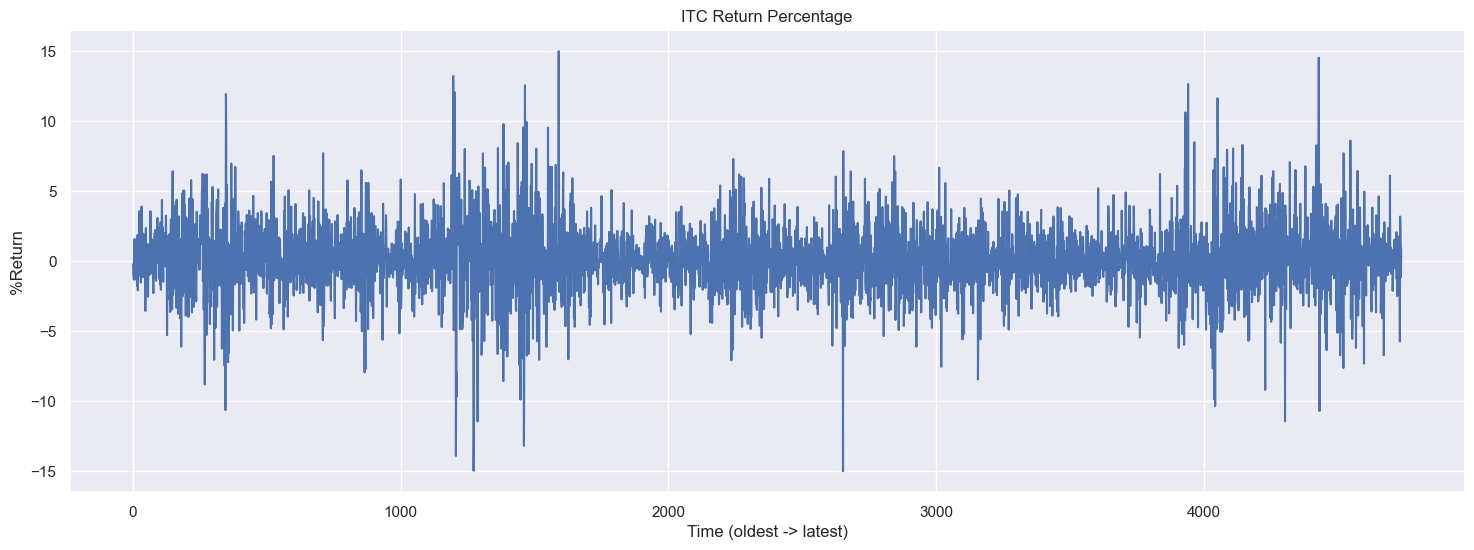

In [22]:
plt.figure(figsize=(18, 6))
plt.plot(dataset['%Return'])
plt.title("ITC Return Percentage")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("%Return")
plt.show()

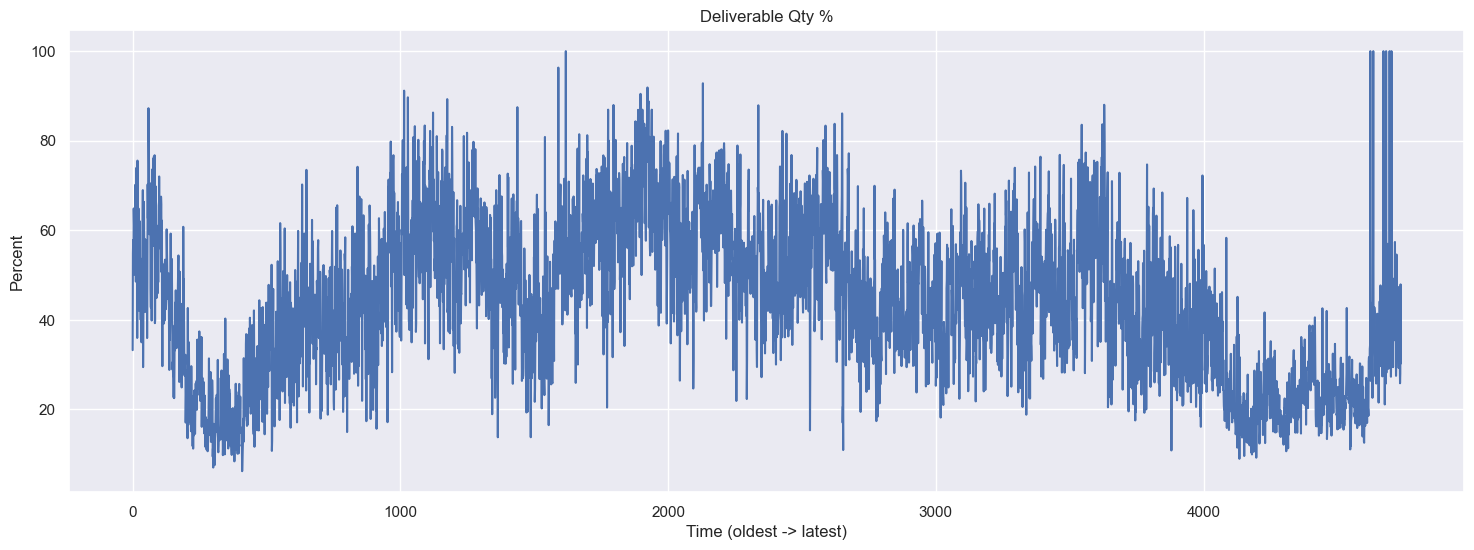

In [20]:
plt.figure(figsize=(18, 6))
plt.plot(dataset['% Dly Qt to Traded Qty'])
plt.title("Deliverable Qty %")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Percent")
plt.show()

C:\Users\satya\AppData\Local\Temp\ipykernel_10236\2583820864.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['%Return'],bins=55)


Text(0.5, 0, 'Return %')

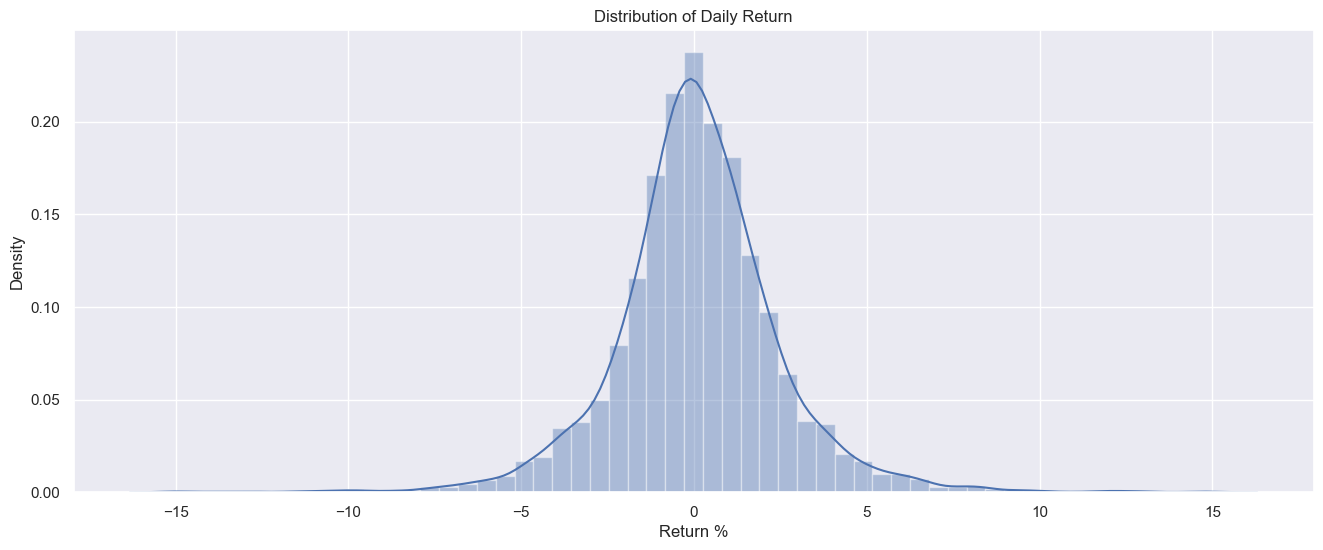

In [21]:
#Distibution Plot of Daily Return %
dataset['%Return'] = np.where(dataset['%Return'] < -15,
                                           -1,
                                           dataset['%Return'])
dataset['%Return'] = np.where(dataset['%Return'] > 15,
                                           1,
                                           dataset['%Return'])
plt.figure(figsize=(16, 6))
sns.distplot(dataset['%Return'],bins=55)
plt.title("Distribution of Daily Return")
plt.xlabel("Return %")

C:\Users\satya\AppData\Local\Temp\ipykernel_10236\2123060127.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['% Dly Qt to Traded Qty'],bins=45)


Text(0.5, 0, '% Dly Qt to Traded Qty')

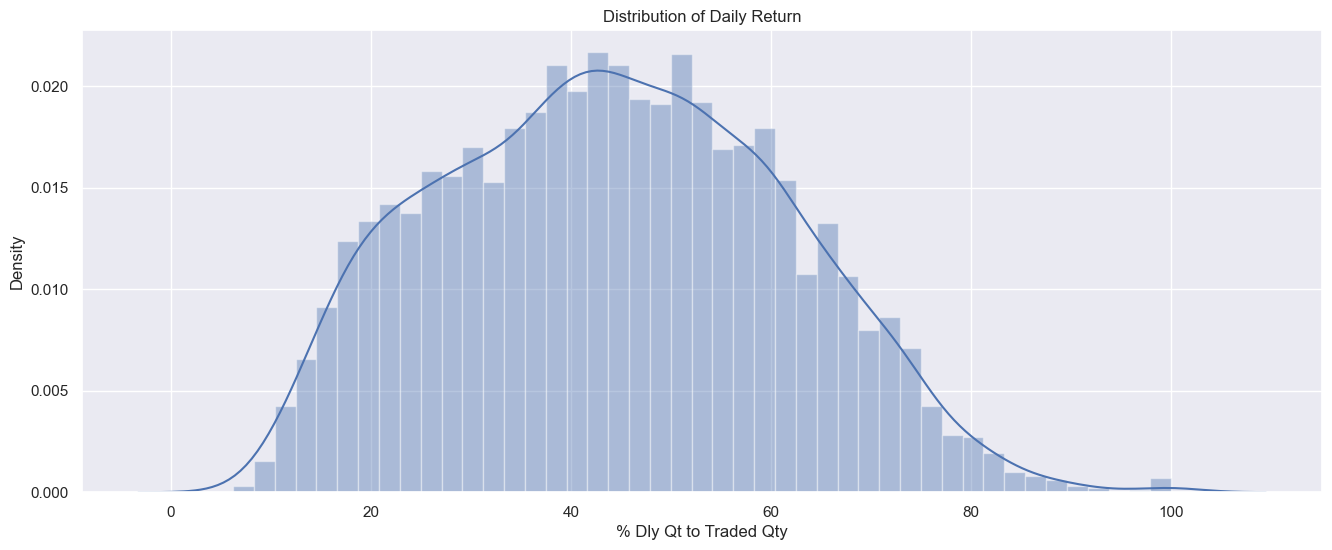

In [23]:
#Distibution Plot of Daily Return %

plt.figure(figsize=(16, 6))
sns.distplot(dataset['% Dly Qt to Traded Qty'],bins=45)
plt.title("Distribution of Daily Return")
plt.xlabel("% Dly Qt to Traded Qty")

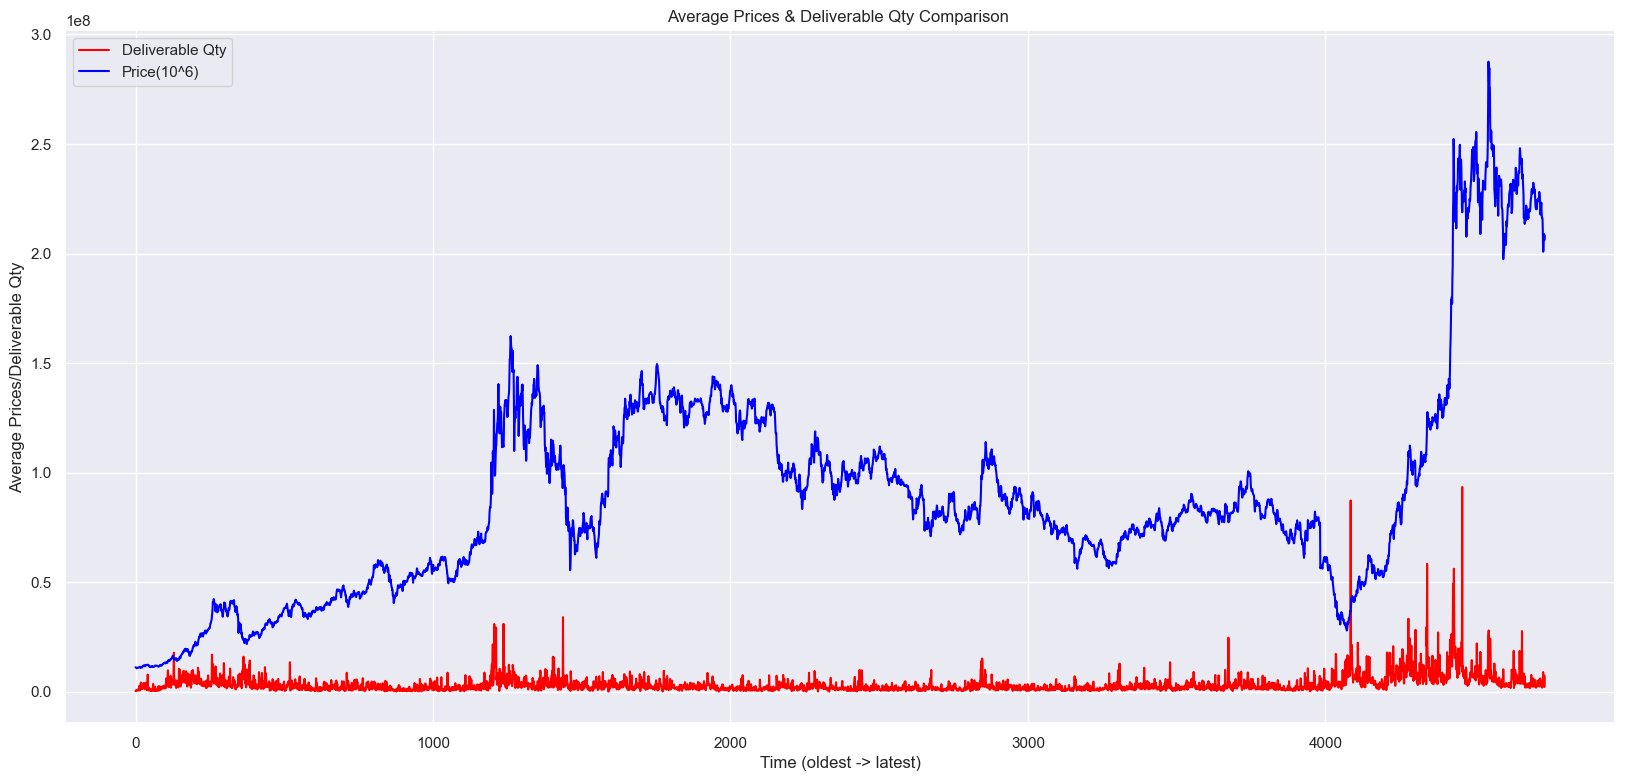

In [24]:
#Representing Price on Graph
plt.figure(figsize=(20, 9))
plt.plot(dataset['Deliverable Qty'], color = 'red', label = 'Deliverable Qty')
plt.plot(dataset['Average Price']*1000000, color = 'blue', label = 'Price(10^6)')
plt.title("Average Prices & Deliverable Qty Comparison ")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Average Prices/Deliverable Qty")
plt.legend()
plt.show()

Text(0, 0.5, 'Deliverable Qty * 10^6')

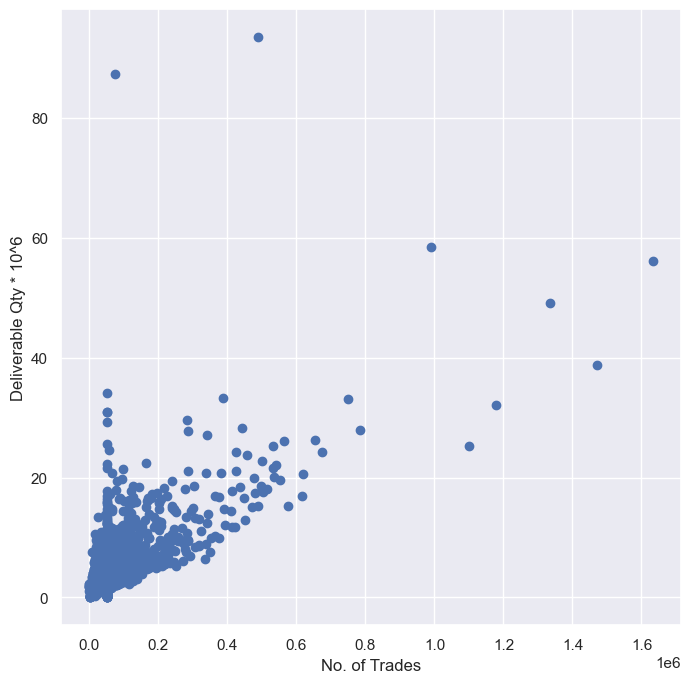

In [25]:
# Distribution of Number of Trades to the Deliverable Qty
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(dataset['No. of Trades'],dataset['Deliverable Qty']/1000000)
plt.xlabel("No. of Trades")
plt.ylabel("Deliverable Qty * 10^6")

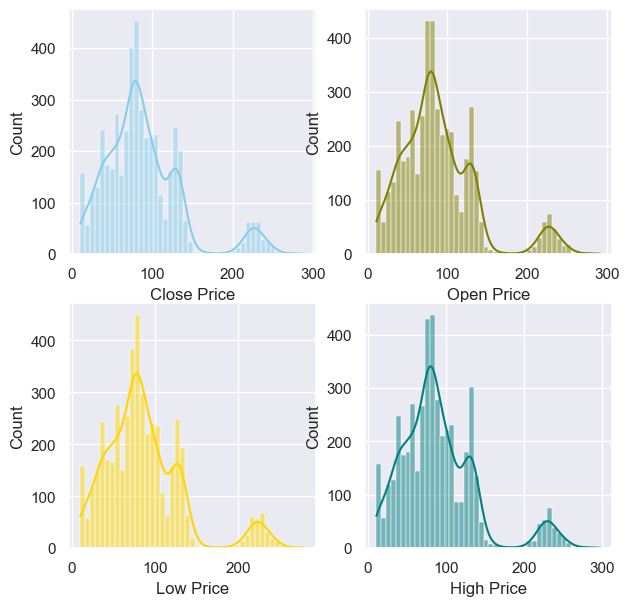

In [26]:
#Distribution of Open, Close, High & Low Price Comparison 
df = dataset

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="Close Price", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Open Price", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Low Price", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="High Price", kde=True, color="teal", ax=axs[1, 1])

plt.show()